In [1]:
import gstools as gs
import numpy as np
import matplotlib.pyplot as plt
import vtk

In [2]:
x = y = range(100)

# uniformly generate 1000 numbers in range (1, 1.5)
variances = np.random.uniform(1, 1.5, 1000)
length_scales = np.random.uniform(10, 25, 1000)

models = [gs.Gaussian(dim=2, var=variance_i, len_scale=len_scale_i) 
          for variance_i, len_scale_i in zip(variances, length_scales)]

/Users/benbarlow/dev/sandbox/gstools/.venv/lib/python3.9/site-packages/gstools/field/plot.py:401: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Field 2D structured: (100, 100)'}, xlabel='$x$', ylabel='$y$'>

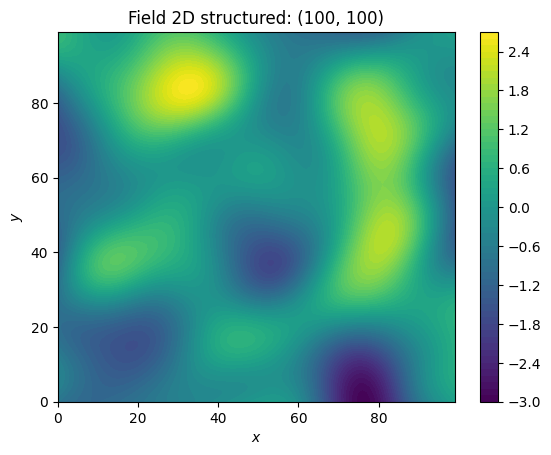

In [3]:
srf = gs.SRF(models[1])
srf((x, y), mesh_type='structured')
srf.plot()

In [4]:
srf.vtk_export("field")

'/Users/benbarlow/dev/sandbox/gstools/field.vtr'

In [9]:
# https://www.kitware.com/easy-data-conversion-to-vtk-with-python/

reader = vtk.vtkTIFFReader()
#reader.SetFilename("file.tif")
#reader.Update()
reader.SetFileName("field.vtk")
reader.Update()
my_vtk_dataset = reader.GetOutput()

2024-06-19 10:29:26.000 (  75.581s) [           20D7A]      vtkTIFFReader.cxx:380    ERR| vtkTIFFReader (0x11fbbae80): Unable to open file field.vtk Reason: No such file or directory
2024-06-19 10:29:26.001 (  75.581s) [           20D7A]       vtkExecutive.cxx:730    ERR| vtkCompositeDataPipeline (0x11fbbc2d0): Algorithm vtkTIFFReader (0x11fbbae80) returned failure for request: vtkInformation (0x11fb93c80)
  Debug: Off
  Modified Time: 388
  Reference Count: 1
  Registered Events: (none)
  Request: REQUEST_INFORMATION
  ALGORITHM_AFTER_FORWARD: 1
  FORWARD_DIRECTION: 0




In [12]:
my_vtk_dataset = vtk.vtkUnstructuredGrid()
points = vtk.vtkPoints()

number_of_points = 100 * 100

for id in range(number_of_points):
    points.InsertPoint(id, [x, y, 1])
my_vtk_dataset.SetPoints(points)

NameError: name 'z' is not defined

In [4]:
# generate a synthetic field with an exponential model
x = np.random.RandomState(19970221).rand(1000) * 100.
y = np.random.RandomState(20011012).rand(1000) * 100.
model = gs.Exponential(dim=2, var=2, len_scale=8)
srf = gs.SRF(model, mean=0, seed=19970221)

NameError: name 'plot' is not defined

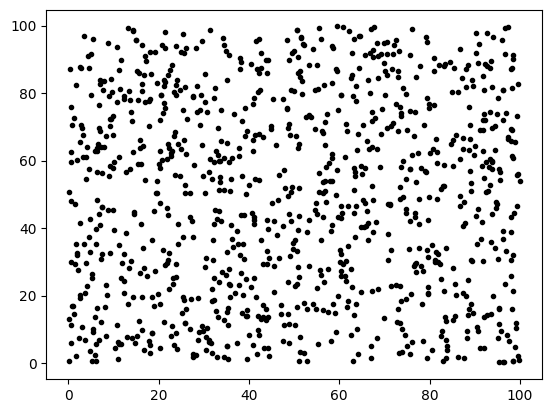

In [7]:
# scatter plot
plt.plot(x, y, 'k.', label='data')

Stable(dim=2, var=1.85, len_scale=7.42, nugget=0.0, alpha=1.09)


/Users/benbarlow/dev/sandbox/gstools/.venv/lib/python3.9/site-packages/gstools/covmodel/plot.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


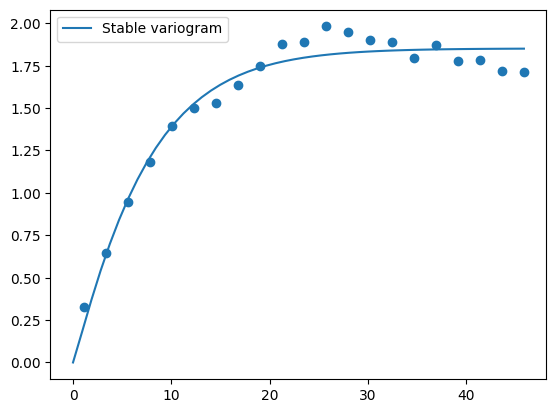

In [3]:
field = srf((x, y))
# estimate the variogram of the field
bin_center, gamma = gs.vario_estimate((x, y), field)
# fit the variogram with a stable model. (no nugget fitted)
fit_model = gs.Stable(dim=2)
fit_model.fit_variogram(bin_center, gamma, nugget=False)
# output
ax = fit_model.plot(x_max=max(bin_center))
ax.scatter(bin_center, gamma)
print(fit_model)